# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

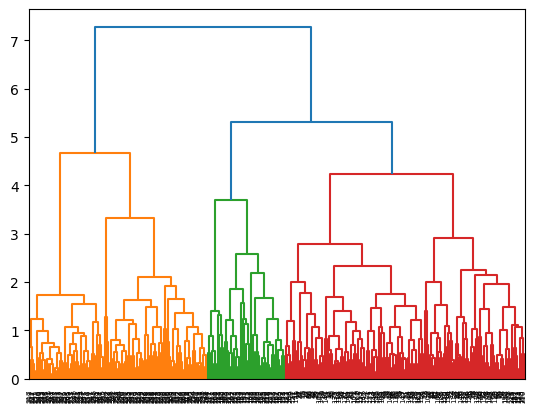

In [59]:
# Carregando a base de dados pinguim

penguins = sns.load_dataset('penguins')
penguins.index.name='id'

# Selecionando as variáveis quantitativas e eliminando os valores faltantes

peng_num = penguins.select_dtypes(include='number').dropna()

# Padronizando as variáveis

padronizar = StandardScaler()
peng_pad = padronizar.fit_transform(peng_num)

# # Agrupamento hierárquico em três grupos

cluster = AgglomerativeClustering(metric='euclidean', linkage='complete', n_clusters=3)
cluster.fit(peng_pad)
peng_num['cluster'] = cluster.labels_

# Dendograma

dend = shc.dendrogram(shc.linkage(peng_pad, method='complete'))

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [37]:
peng = penguins.merge(peng_num['cluster'], how='left', on='id')

pd.crosstab(peng['species'], peng['cluster'])

cluster,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


In [57]:
peng_num.groupby('cluster').mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
cluster,,,,
0,47.504878,14.982114,217.186992,5076.016260
1,39.283030,18.304242,190.048485,3688.181818
2,49.935185,18.568519,197.055556,3779.629630


## Descrição:

Grupo 0: Apresenta a profundidade do bico, tamanho da para e massa corpórea mais distante dos demais.

Grupo 1: Apresenta o menor bico comparado com os demais grupos, as demais estatísticas são parecidas com o grupo 2.

Grupo 2: Estatísticas parecidas com o grupo 1.

## 3) Alterando o agrupamento

O Dendrogarma sugere que podem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [ ]:
# Segundo o dendograma, uma sugestão da quantidade de grupos é 4 ou 5 cinco grupos,
# entre as distâncias de 4 e 5.

In [66]:
# 4 grupos

cluster = AgglomerativeClustering(metric='euclidean', linkage='complete', n_clusters=4)
cluster.fit(peng_pad)
peng_num['cluster'] = cluster.labels_

peng = penguins.merge(peng_num['cluster'], how='left', on='id')

pd.crosstab(peng['species'], peng['cluster'])

cluster,0.0,1.0,2.0,3.0
species,,,,
Adelie,151,0,0,0
Chinstrap,14,0,54,0
Gentoo,0,71,0,52


In [67]:
pd.crosstab(peng['sex'], peng['cluster'])

cluster,0.0,1.0,2.0,3.0
sex,,,,
Female,87,9,20,49
Male,73,61,34,0


In [70]:
peng_num.groupby('cluster').mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
cluster,,,,
0,39.283030,18.304242,190.048485,3688.181818
1,49.192958,15.625352,220.985915,5407.042254
2,49.935185,18.568519,197.055556,3779.629630
3,45.200000,14.103846,212.000000,4624.038462


## Análise:

- Observa-se que a divisão ocorreu apenas no Gentoo, os 123 indivíduos foram divididos em 02 grupos, 1 e 3. Na análise com três grupos, o Gentoo era o grupo 0, o que está em concordância com o dendograma.

- Analisando o sexo, observa-se que na nova divisão não há indivíduos do sexo masculino no grupo 3.

- Ao analisar a média da massa dos grupos 1 e 3 observa-se que uma diferença de 1 kg, e considerando que o grupo 3 só apresenta fêmeas e o 1 apresenta muito mais machos do que fêmeas, pode-se afirmar que o novo grupo separou os machos das fêmeas de uma mesma espécie, provavelmente considerando a diferença de peso entre o macho e a fêmea.